# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Amar Haris Yunianto
- **Email:** amarharisyunianto@gmail.com
- **ID Dicoding:** amarhrs

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca dan musim mempengaruhi jumlah penyewaan sepeda?
- Apakah terdapat pola penyewaan sepeda yang berbeda antara hari kerja dan akhir pekan atau hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat Tabel Day
day_df = pd.read_csv("data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat Tabel Hour
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### day_df

In [4]:
# memeriksa tipe data dari tiap kolom
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# memeriksa duplikasi dan ringkasan parameter statistik
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### hour_df

In [6]:
# memeriksa tipe data dari tiap kolom
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# memeriksa duplikasi dan ringkasan parameter statistik
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### day_df

In [8]:
# mengganti tipe data pada dteday menjadi datetime
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### hour_df

In [10]:
# mengganti tipe data pada dteday menjadi datetime
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [12]:
# Distribusi Penyewaan Sepeda Berdasarkan Musim
season_avg = day_df.groupby("season")["cnt"].agg(['mean', 'median'])
print("Rata-rata dan Median Penyewaan Sepeda Berdasarkan Musim:")
print(season_avg)

Rata-rata dan Median Penyewaan Sepeda Berdasarkan Musim:
               mean  median
season                     
1       2604.132597  2209.0
2       4992.331522  4941.5
3       5644.303191  5353.5
4       4728.162921  4634.5


In [13]:
# Pengaruh Cuaca Terhadap Penyewaan Sepeda
weather_avg = day_df.groupby("weathersit")["cnt"].agg(['mean', 'median'])
print("\nRata-rata dan Median Penyewaan Sepeda Berdasarkan Kondisi Cuaca:")
print(weather_avg)


Rata-rata dan Median Penyewaan Sepeda Berdasarkan Kondisi Cuaca:
                   mean  median
weathersit                     
1           4876.786177  4844.0
2           4035.862348  4040.0
3           1803.285714  1817.0


In [14]:
# Pola Penyewaan Berdasarkan Hari Kerja vs Hari Libur
workingday_avg = day_df.groupby("workingday")["cnt"].agg(['mean', 'median'])
print("\nRata-rata dan Median Penyewaan Sepeda: Hari Kerja vs Hari Libur:")
print(workingday_avg)


Rata-rata dan Median Penyewaan Sepeda: Hari Kerja vs Hari Libur:
                   mean  median
workingday                     
0           4330.168831  4459.0
1           4584.820000  4582.0


In [15]:
# Eksplorasi Tren Penyewaan Sepeda Berdasarkan Tahun
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['month'] = day_df['dteday'].dt.to_period('M')
monthly_avg = day_df.groupby("month")["cnt"].mean()
print("\nRata-rata Penyewaan Sepeda Per Bulan:")
print(monthly_avg)


Rata-rata Penyewaan Sepeda Per Bulan:
month
2011-01    1231.903226
2011-02    1721.964286
2011-03    2065.967742
2011-04    3162.333333
2011-05    4381.322581
2011-06    4783.733333
2011-07    4559.387097
2011-08    4409.387097
2011-09    4247.266667
2011-10    3984.225806
2011-11    3405.566667
2011-12    2816.870968
2012-01    3120.774194
2012-02    3556.448276
2012-03    5318.548387
2012-04    5807.466667
2012-05    6318.225806
2012-06    6761.000000
2012-07    6567.967742
2012-08    6919.451613
2012-09    7285.766667
2012-10    6414.225806
2012-11    5088.800000
2012-12    3990.741935
Freq: M, Name: cnt, dtype: float64


### Explore Data hour_df

In [16]:
# Distribusi Penyewaan Sepeda Berdasarkan Jam
hour_avg = hour_df.groupby("hr")["cnt"].agg(['mean', 'median'])
print("\nRata-rata dan Median Penyewaan Sepeda Berdasarkan Jam:")
print(hour_avg)


Rata-rata dan Median Penyewaan Sepeda Berdasarkan Jam:
          mean  median
hr                    
0    53.898072    40.0
1    33.375691    20.0
2    22.869930    11.0
3    11.727403     6.0
4     6.352941     6.0
5    19.889819    19.0
6    76.044138    76.0
7   212.064649   208.0
8   359.011004   385.0
9   219.309491   216.0
10  173.668501   147.0
11  208.143054   180.0
12  253.315934   229.0
13  253.661180   224.0
14  240.949246   212.0
15  251.233196   227.0
16  311.983562   304.5
17  461.452055   475.0
18  425.510989   418.5
19  311.523352   309.5
20  226.030220   223.5
21  172.314560   173.5
22  131.335165   129.0
23   87.831044    80.0


In [17]:
# Pengaruh Cuaca Terhadap Penyewaan Sepeda Berdasarkan Jam
hour_weather_avg = hour_df.groupby(["hr", "weathersit"])["cnt"].agg(['mean', 'median'])
print("\nRata-rata dan Median Penyewaan Sepeda Berdasarkan Jam dan Kondisi Cuaca:")
print(hour_weather_avg)


Rata-rata dan Median Penyewaan Sepeda Berdasarkan Jam dan Kondisi Cuaca:
                     mean  median
hr weathersit                    
0  1            59.161554    47.0
   2            47.232432    34.0
   3            28.115385    19.5
1  1            34.395918    21.0
   2            35.541899    19.0
...                   ...     ...
22 2           116.823171   113.0
   3            70.345455    55.0
23 1            93.981707    87.0
   2            85.171598    74.0
   3            49.373134    42.0

[75 rows x 2 columns]


In [18]:
# Pola Penyewaan Berdasarkan Hari Kerja vs Hari Libur Berdasarkan Jam
hour_workingday_avg = hour_df.groupby(["hr", "workingday"])["cnt"].agg(['mean', 'median'])
print("\nRata-rata dan Median Penyewaan Sepeda: Hari Kerja vs Hari Libur Berdasarkan Jam:")
print(hour_workingday_avg)


Rata-rata dan Median Penyewaan Sepeda: Hari Kerja vs Hari Libur Berdasarkan Jam:
                     mean  median
hr workingday                    
0  0            90.800000    93.5
   1            36.786290    33.0
1  0            69.508696    71.0
   1            16.552632    14.0
2  0            53.171053    54.0
   1             8.683778     7.0
3  0            25.775330    25.0
   1             4.942553     4.0
4  0             8.264317     7.0
   1             5.429787     5.0
5  0             8.689189     7.0
   1            24.913131    25.0
6  0            18.742358    16.0
   1           102.500000   104.0
7  0            43.406926    39.0
   1           290.612903   295.0
8  0           105.653680    94.0
   1           477.006048   463.0
9  0           171.623377   170.0
   1           241.518145   228.0
10 0           255.909091   260.0
   1           135.366935   133.0
11 0           315.316017   317.0
   1           158.229839   157.0
12 0           366.259740   367.0


### Eksplor Data day_df dan hour_df

In [19]:
# Gabungkan data day_df dan hour_df
combined_df = day_df.merge(hour_df, on='dteday', suffixes=('_day', '_hour'))
combined_df.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


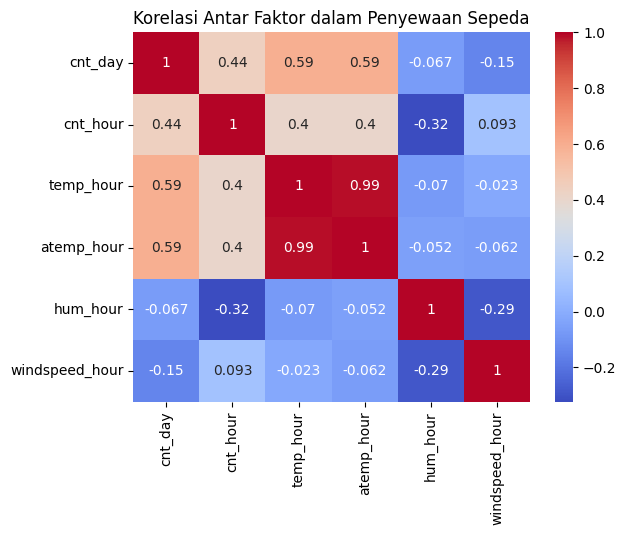

In [20]:
# Korelasi Antara Faktor Cuaca dan Musim dengan Jumlah Penyewaan Sepeda
correlation = combined_df[['cnt_day', 'cnt_hour', 'temp_hour', 'atemp_hour', 'hum_hour', 'windspeed_hour']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title('Korelasi Antar Faktor dalam Penyewaan Sepeda')
plt.show()

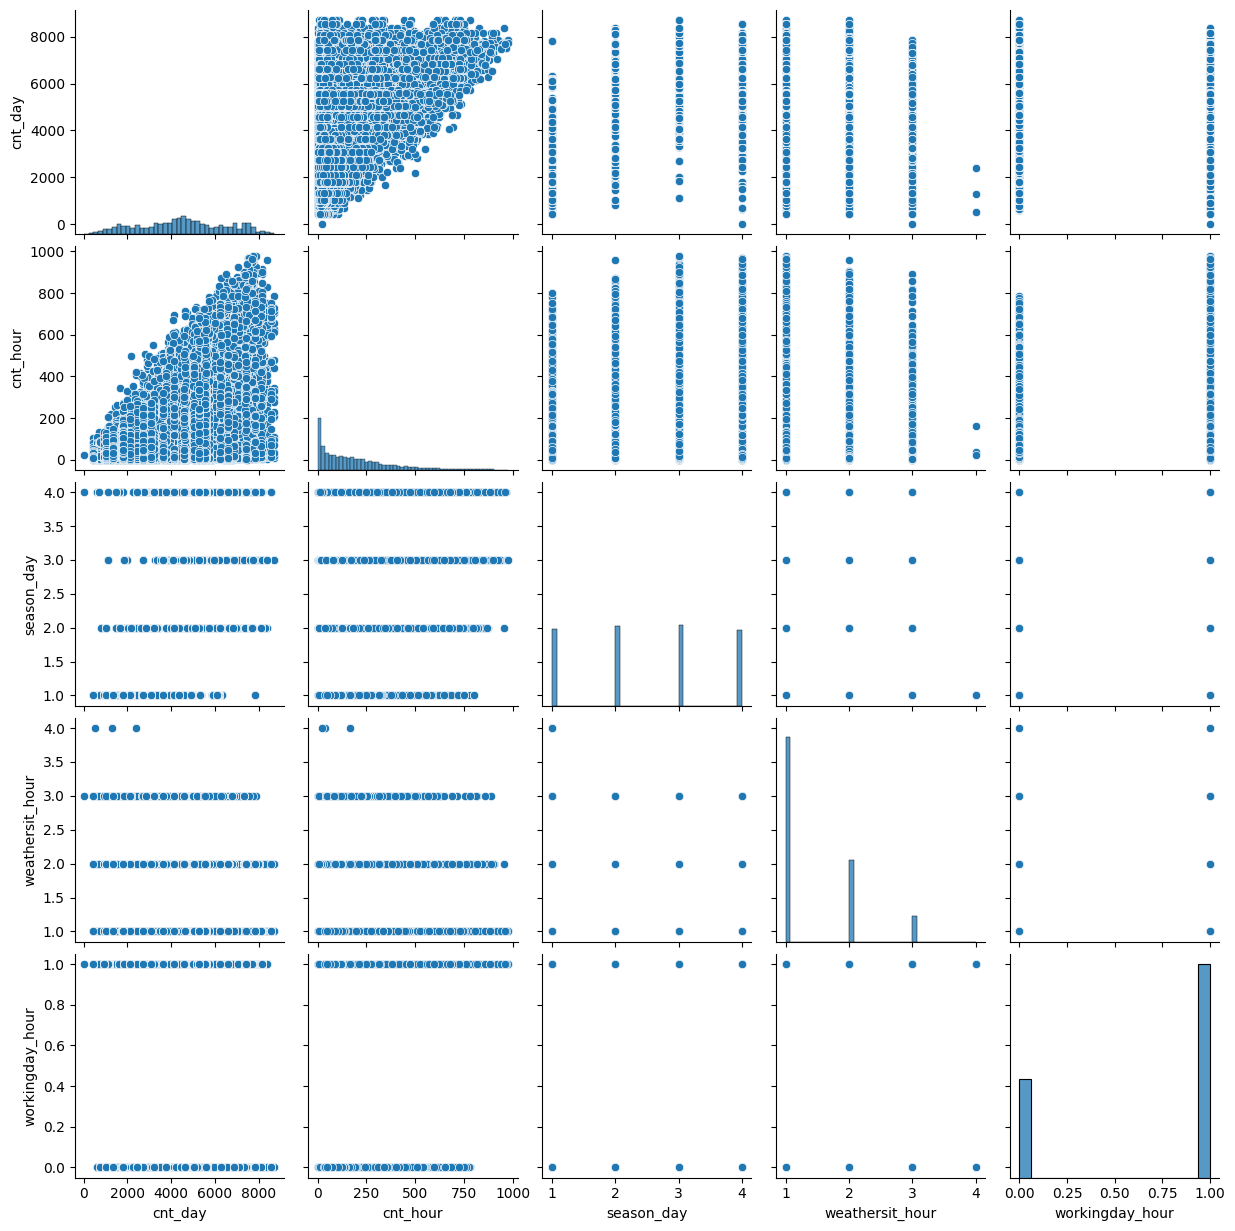

In [21]:
# Visualisasi Distribusi Penyewaan Sepeda
sns.pairplot(combined_df[['cnt_day', 'cnt_hour', 'season_day', 'weathersit_hour', 'workingday_hour']])
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

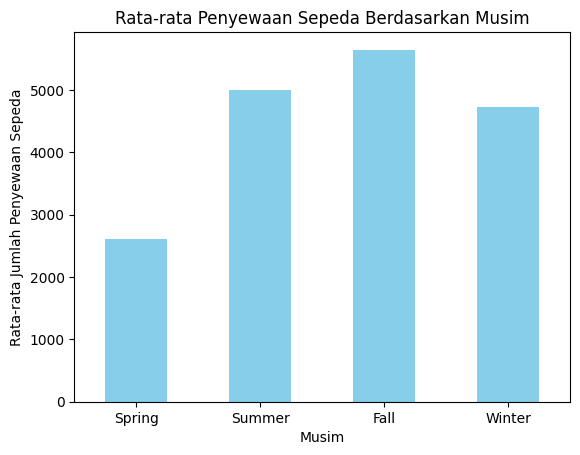

In [22]:
# Distribusi Penyewaan Sepeda Berdasarkan Musim
season_avg = day_df.groupby("season")["cnt"].mean()
season_avg.plot(kind='bar', title='Rata-rata Penyewaan Sepeda Berdasarkan Musim', color='skyblue')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.show()

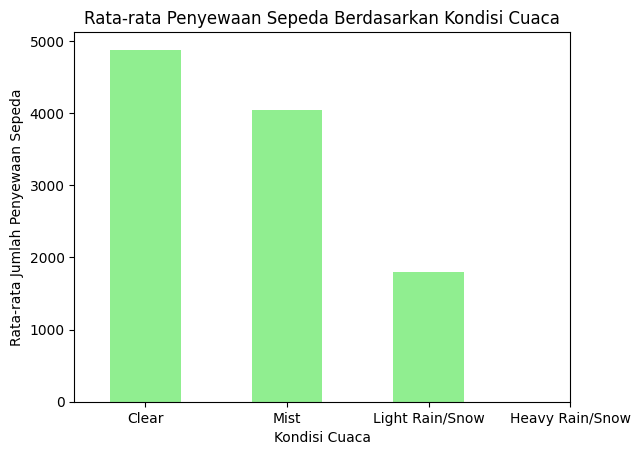

In [23]:
# Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca
weather_avg = day_df.groupby("weathersit")["cnt"].mean()
weather_avg.plot(kind='bar', title='Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca', color='lightgreen')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'], rotation=0)
plt.show()

### Pertanyaan 2:

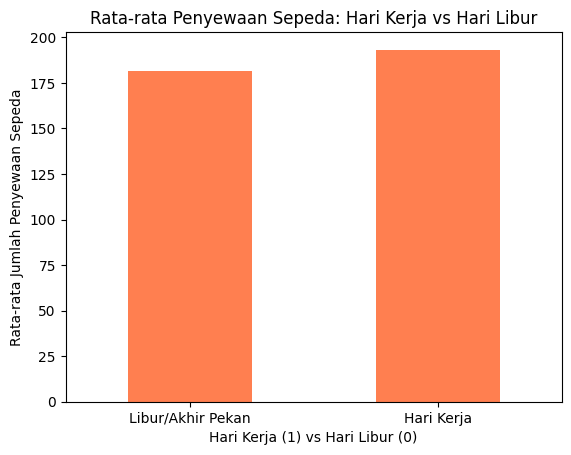

In [24]:
# Pola Penyewaan Berdasarkan Hari Kerja vs Hari Libur
workingday_avg = hour_df.groupby("workingday")["cnt"].mean()
workingday_avg.plot(kind='bar', title='Rata-rata Penyewaan Sepeda: Hari Kerja vs Hari Libur', color='coral')
plt.xlabel('Hari Kerja (1) vs Hari Libur (0)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks([0, 1], ['Libur/Akhir Pekan', 'Hari Kerja'], rotation=0)
plt.show()

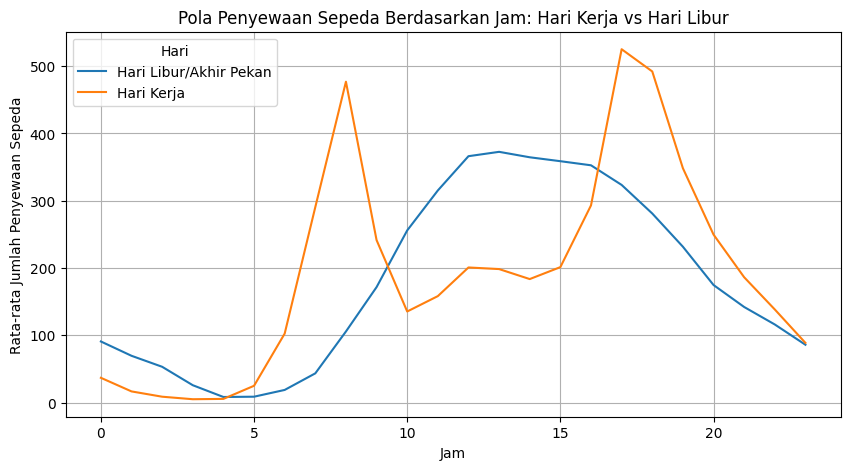

In [25]:
# Pola Penyewaan Berdasarkan Jam pada Hari Kerja vs Hari Libur
hourly_trend = hour_df.groupby(["hr", "workingday"])["cnt"].mean().unstack()
hourly_trend.plot(kind='line', title='Pola Penyewaan Sepeda Berdasarkan Jam: Hari Kerja vs Hari Libur', figsize=(10, 5))
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.legend(['Hari Libur/Akhir Pekan', 'Hari Kerja'], title='Hari')
plt.grid(True)
plt.show()

## Conclusion

#### Conclusion Pertanyaan 1: Bagaimana Cuaca dan Musim Mempengaruhi Jumlah Penyewaan Sepeda?
##### Cuaca dan musim memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Berdasarkan analisis data:
- **Musim:** Jumlah penyewaan sepeda cenderung lebih tinggi pada musim panas dan musim gugur. Hal ini disebabkan oleh cuaca yang lebih hangat dan nyaman selama musim tersebut, yang mendorong lebih banyak orang untuk bersepeda.
- **Cuaca:** Kondisi cuaca yang cerah atau berawan ringan menunjukkan rata-rata penyewaan sepeda yang lebih tinggi dibandingkan dengan kondisi cuaca yang lebih buruk seperti hujan atau salju. Orang cenderung memilih untuk bersepeda ketika cuaca mendukung, sehingga cuaca yang kurang baik mengurangi minat untuk menyewa sepeda.

#### Conclusion Pertanyaan 2: Apakah Terdapat Pola Penyewaan Sepeda yang Berbeda antara Hari Kerja dan Akhir Pekan atau Hari Libur?
##### Pola penyewaan sepeda memang menunjukkan perbedaan yang jelas antara hari kerja dan hari libur atau akhir pekan:
- **Hari Kerja:** Pada hari kerja, jumlah penyewaan sepeda cenderung lebih tinggi, terutama selama jam sibuk di pagi dan sore hari. Ini menunjukkan bahwa sepeda sering digunakan sebagai sarana transportasi untuk bepergian ke dan dari tempat kerja.
- **Hari Libur/Akhir Pekan:** Pada hari libur atau akhir pekan, pola penyewaan lebih merata sepanjang hari, dengan kemungkinan puncak di tengah hari. Ini mengindikasikan penggunaan sepeda untuk tujuan rekreasi atau aktivitas santai, berbeda dengan hari kerja yang lebih terfokus pada kebutuhan transportasi harian.